<H1><center>BMI, Age and Glucose Effect on Insulin: A Controlled Experiment in Diabetes</center></H1>



<center> Master of Information: INF2178<br>
Professor: Shion Guha<br>
Creator: Qinren Kang<br>
Date: Mar 27, 2022<br>
 </center>

***Data Source: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231*** 

***Retrieved from: Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/metadata***

# 0.0 Research Question and Hypothesis

## 0.1 Research Question
* Does BMI, age, glucose has effect on Insulin for both diabetes and non-diabetes group?

## 0.2 Hypothesis
* H0: There is no effect and correlation among BMI, age, glucose and insulin level for both groups
* H1: There is a correlation and effect among BMI, age, glucose and insulin level for any groups 

# 1.0 Data Cleaning


## 1.1 Data Overview, Statistic Analysis and Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# setting a relative working environment
cwd = os.getcwd()
data = cwd + "/diabetes.csv"

# creates a preview of the data
df = pd.read_csv(data)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Check basic stats of the data and dicover unusual observations
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
# checking data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# Total number of rows and columns
df.shape

(768, 9)

In [50]:
# Checking if duplicated values are existed
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [51]:
# Finding the null values.
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Tidy Data Principle
1. Each variable must have its own column **[satisfied]**

2. Each observation must have its own row **[satisfied]**

3. Each value must have its own cell **[satisfied]**

Source: Tierney, N. J., & Cook, D. H. (2018). Expanding tidy data principles to facilitate missing data exploration, visualization and assessment of imputations. arXiv preprint arXiv:1809.02264.***

In [52]:
#checks how many 0s in each catogory
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

The boxplot shows the dispersion and skewness of each factor, as shown below, 'Insulin' has some obvious noise


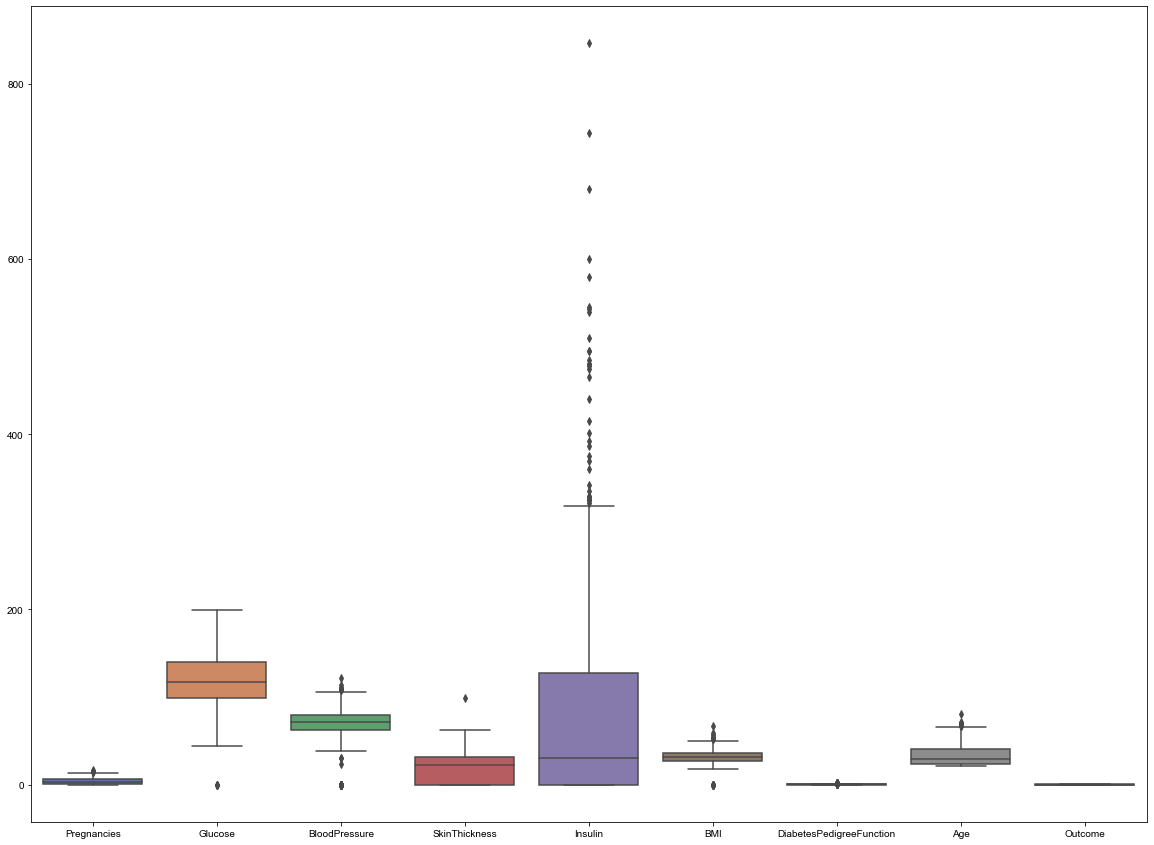

In [6]:
# Detect the data distribution for cleaning methods consideration
fig , ax = plt.subplots(figsize = (20,15))
sns.set(font_scale = 2)
bp = sns.boxplot(data = df, ax = ax)
print("The boxplot shows the dispersion and skewness of each factor, as shown below, 'Insulin' has some obvious noise")

#### To reveal the outliers for diabetes and non-diabetes, controlled and experimental groups needed to be visualized based on outcome 0s, and 1s

8


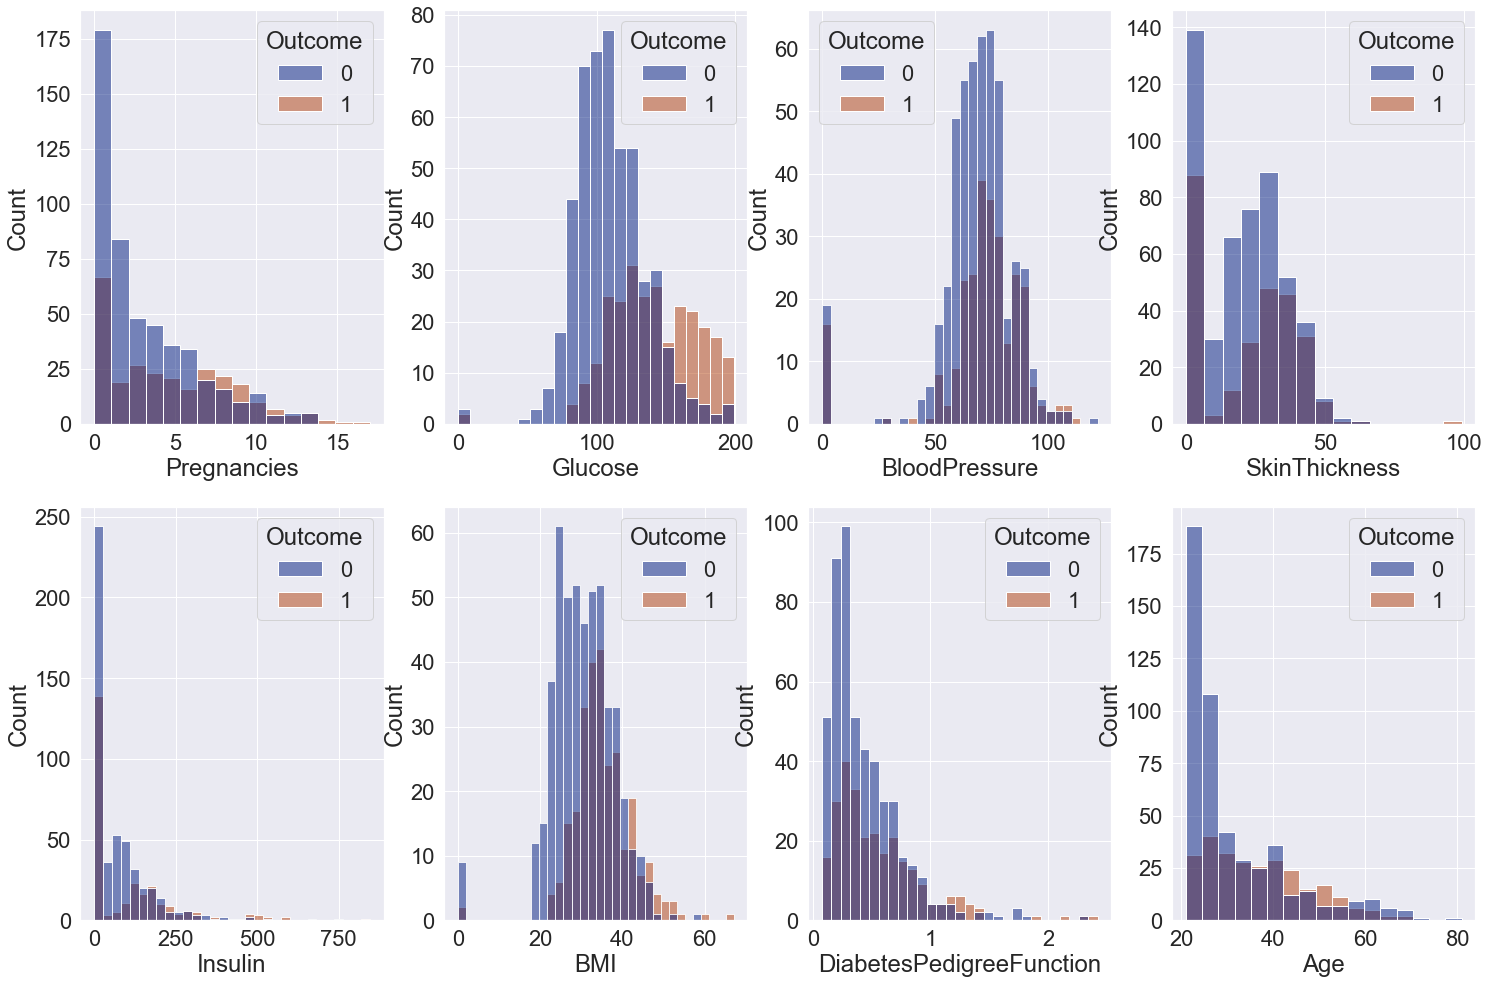

In [9]:
# histogram for each category and their corresponding count in outcome 0s and 1s 
feature_names = [cname for cname in df.loc[:,:'Age'].columns]
print(len(feature_names))
fig =plt.subplots(figsize = (25,35))
sns.set(font_scale = 2)
i=1
for name in feature_names:
    plt.subplot(4,4,i)
    sns.histplot(x=name, hue="Outcome", data=df, palette="dark")
    i+=1

## 1.2 Data Cleaning

#### Replaced the 'Insulin' with median since it was highly skewed from the diagrams shown above; 'Age', 'BMI' and 'Glucose' are filled with mean

In [75]:
# Fill the unusual values with median and mean accordingly
df["Age"]=df["Age"].mask(df["Age"]==0).fillna(df["Age"].mean())
df["BMI"]=df["BMI"].mask(df["BMI"]==0).fillna(df["BMI"].mean())
df["Glucose"]=df["Glucose"].mask(df["Glucose"]==0).fillna(df["Glucose"].mean())
df["Insulin"]=df["Insulin"].mask(df["Insulin"]==0).fillna(df["Insulin"].median())

***Separated Outcome 0s as 'df_0' indicating non-diabetes group; 'df_1' indicates diabetes group***

In [56]:
# Craeting dummies for both diabetes and non-diabetes, respectively.
df_0 = df[df['Outcome'] == 0] # experimental group
df_1 = df[df['Outcome'] == 1] # controlled group

In [57]:
# melt the data for both diabetes and non-diabetes group
dfm_1=pd.melt(df_1.reset_index(), id_vars=['Insulin'], value_vars=["Age", "BMI", "Glucose"])
dfm_1.columns = ['Insulin', 'treatments', 'value']

dfm_0=pd.melt(df_0.reset_index(), id_vars=['Insulin'], value_vars=["Age", "BMI", "Glucose"])
dfm_0.columns = ['Insulin', 'treatments', 'value']

In [58]:
# Checks how many 0s in each catogory
exp = df_0.eq(0).sum() # experiment group / non-diabetes
ctl = df_1.eq(0).sum() # control group / diabetes
print(exp, ctl)

Pregnancies                  73
Glucose                       0
BloodPressure                19
SkinThickness               139
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64 Pregnancies                 38
Glucose                      0
BloodPressure               16
SkinThickness               88
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


# 2.0 Exploratory Data Analysis

## 2.1 General Visualization and T-Test

Text(0.5, 1.0, 'Correlation Heatmap')

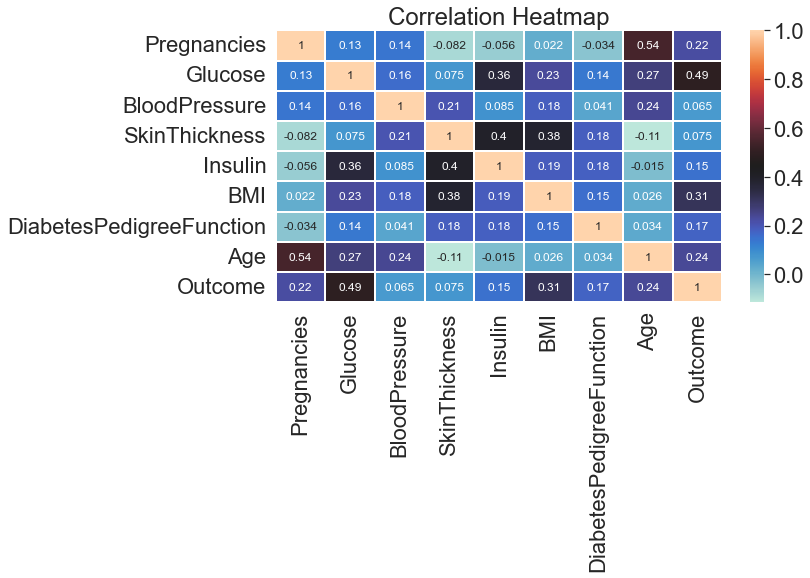

In [74]:
# correlation heatmap for all factors
ax = sns.heatmap(df.corr(), annot=True, linewidth = 1.5, cmap="icefire", annot_kws={"fontsize":12});
ax.set_title("Correlation Heatmap")

### 2.1.1 General Visualization and T-Test for Diabetes

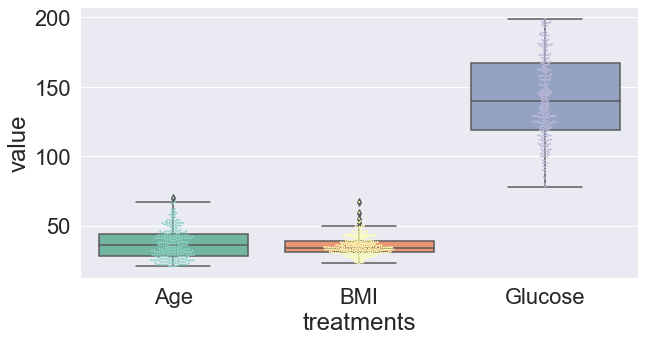

In [40]:
# Generate a boxplot to see the data distribution by treatments for diabetes
ax = sns.boxplot(x='treatments', y='value', data=dfm_1, palette="Set2")
ax = sns.swarmplot(x="treatments", y="value", data=dfm_1, palette="Set3", size=2)
plt.show()

In [17]:
# T test for BMI and Insulin of diabetes
# shapiro-wilk test can be used to check the normal distribution of residuals 
from scipy import stats
tStat, pValue = stats.ttest_ind(df_1[["BMI","Age", "Glucose"]], df_1["Insulin"], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[2.85069008e-21 1.58931173e-20 1.23416668e-03] T-Statistic:[-10.32741763 -10.08790002   3.26240611]


### 2.1.2 General Visualization and T-Test for Non-diabetes

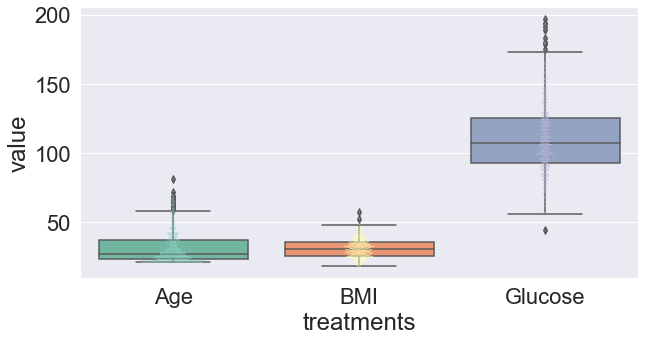

In [41]:
# Generate a boxplot to see the data distribution by treatments for non-diabetes
ax = sns.boxplot(x='treatments', y='value', data=dfm_0, palette="Set2")
ax = sns.swarmplot(x="treatments", y="value", data=dfm_0, palette="Set3", size=1)
plt.show()

In [76]:
# T test for BMI and Insulin of non-diabetes
from scipy import stats
tStat, pValue = stats.ttest_ind(df_0[["BMI","Age", "Glucose"]], df_0["Insulin"], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[1.23960897e-33 4.41791416e-33 8.12980167e-11] T-Statistic:[-13.02474144 -12.87288321   6.62239163]


## 2.2 One Way ANOVA, Post-Hoc for Diabetes and Non-diabetes Groups

### 2.2.1 One Way ANOVA, Post-Hoc for Diabetes

In [20]:
# 1 way ANOVA table for diabetes groups
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(treatments)', data=dfm_1).fit() 
anova_table = sm.stats.anova_lm(model, typ=2)
print(model.summary())
anova_table

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     2901.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:38:45   Log-Likelihood:                -3489.1
No. Observations:                 804   AIC:                             6984.
Df Residuals:                     801   BIC:                             6998.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

sum_sq     df            F  PR(>F)
C(treatments)  2.005435e+06    2.0  2901.431025     0.0
Residual       2.768208e+05  801.0          NaN     NaN

In [21]:
# conduct post hoc for Diabetes
# perform multiple pairwise comparison (Tukey's HSD)
# FWER test
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=dfm_1, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1   group2        Diff       Lower       Upper    q-value   p-value
0    Age      BMI    1.685876   -2.085090    5.456843   1.484602  0.543237
1    Age  Glucose  105.092497  101.321530  108.863463  92.545641  0.001000
2    BMI  Glucose  106.778373  103.007407  110.549339  94.030242  0.001000

### 2.2.2 One Way ANOVA, Post-Hoc for Non-diabetes

In [22]:
# 1 way ANOVA for non-diabetes groups
# Ordinary Least Squares (OLS) model for diabetes groups
model0 = ols('value ~ C(treatments)', data=dfm_0).fit() 
anova_table = sm.stats.anova_lm(model0, typ=2)
print(model0.summary())
anova_table

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     4021.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:38:45   Log-Likelihood:                -6306.3
No. Observations:                1500   AIC:                         1.262e+04
Df Residuals:                    1497   BIC:                         1.263e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

sum_sq      df            F  PR(>F)
C(treatments)  2.115811e+06     2.0  4021.149871     0.0
Residual       3.938388e+05  1497.0          NaN     NaN

In [23]:
# Post hoc test for Non-diabetes
res0 = stat()
res0.tukey_hsd(df=dfm_0, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res0.tukey_summary

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1   group2       Diff      Lower      Upper     q-value  p-value
0    Age      BMI   0.309934  -2.096753   2.716620    0.427273    0.900
1    Age  Glucose  79.515367  77.108681  81.922053  109.619476    0.001
2    BMI  Glucose  79.825301  77.418614  82.231987  110.046749    0.001

## 2.3 QQ-Plot & Histogram, Shapiro-Wilk, Levene’s Test for Diabetes and Non-diabetes

### 2.3.1 QQ-Plot & Histogram, Shapiro-Wilk, Levene’s Test for Diabetes

***Testing normality, data dispersion, and homogeneity of variances***

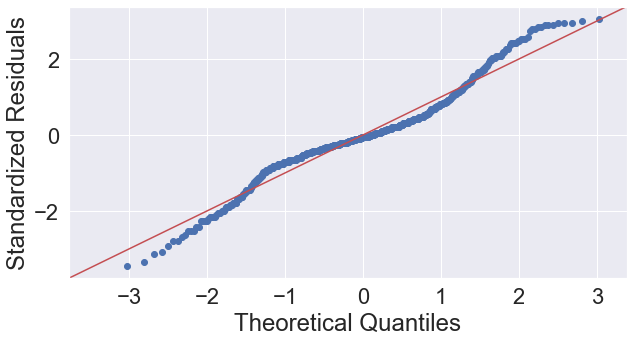

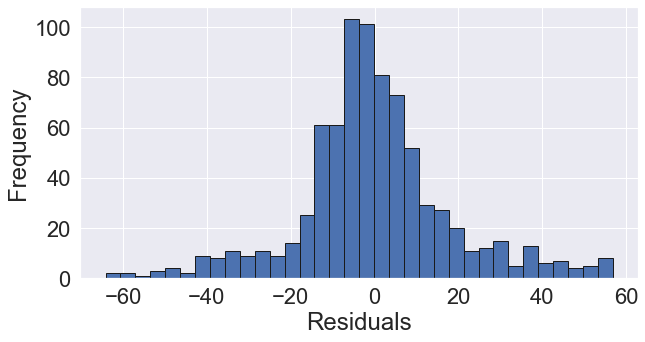

In [24]:
# QQ-plot for Diabetes
# res.anova_std_residuals are standardized residuals obtained from ANOVA 
plt.rcParams['figure.figsize'] = [10, 5]
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [87]:
# Shapiro-Wilk test can be used to check the normal distribution of residuals
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9574476480484009 1.645093837630146e-14


In [88]:
# Levene’s test to check the Homogeneity of variances
res = stat()
res.levene(df=dfm_1, res_var='value', xfac_var='treatments')
res.levene_summary

Parameter     Value
0      Test statistics (W)  294.2007
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000

### 2.3.2 QQ-Plot & Histogram, Shapiro-Wilk, Levene’s Test for Non-diabetes

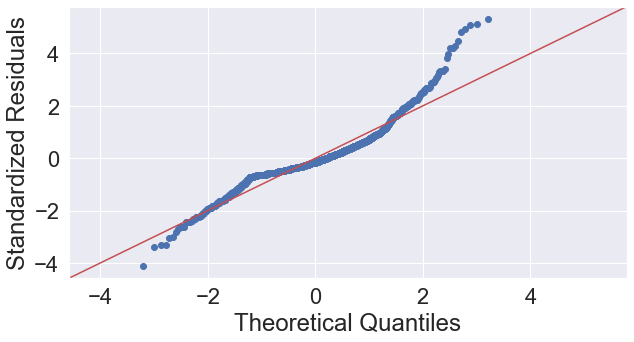

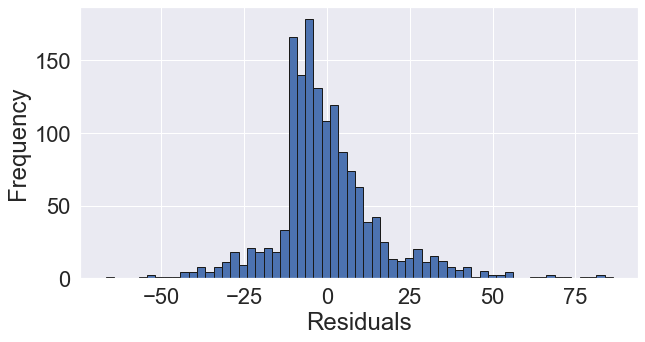

In [26]:
# QQ-plot for Outcome 0s
# res0.anova_std_residuals are standardized residuals obtained from ANOVA 
plt.rcParams['figure.figsize'] = [10, 5]
sm.qqplot(res0.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# histogram
plt.hist(res0.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [85]:
# Non-diabetes tests
# Shapiro-Wilk test can be used to check the normal distribution of residuals
w, pvalue = stats.shapiro(model0.resid)
print(w, pvalue)


0.9166197180747986 5.670373016443454e-28


In [86]:
# Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
res.levene(df=dfm_0, res_var='value', xfac_var='treatments')
res.levene_summary

Parameter     Value
0      Test statistics (W)  229.7969
1  Degrees of freedom (Df)    2.0000
2                  p value    0.0000

# 3.0 Multiple Linear Regression for Diabetes and Non-diabetes Groups

## 3.1 Multiple Linear Regression for Non-diabetes

In [28]:
# MLR for outcome 0s
x0 = df_0[['BMI', "Age", "Glucose"]] # independent variables / treatments
y0 = df_0['Insulin'] # dependent variable
print(x0)

      BMI  Age  Glucose
1    26.6   31     85.0
3    28.1   21     89.0
5    25.6   30    116.0
7    35.3   29    115.0
10   37.6   30    110.0
..    ...  ...      ...
762  22.5   33     89.0
763  32.9   63    101.0
764  36.8   27    122.0
765  26.2   30    121.0
767  30.4   23     93.0

[500 rows x 3 columns]


In [93]:
# Splitting training and testing size for non-diabetes group by a 20% /80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x0, y0, test_size=0.2, random_state=0)
print(X_train, y_train)

      BMI  Age  Glucose
166  32.5   22    148.0
524  31.6   24    125.0
112  31.2   23     89.0
725  39.4   38    112.0
18   43.3   33    103.0
..    ...  ...      ...
507  28.6   21    130.0
313  29.5   25    113.0
181  34.9   23    119.0
80   22.4   22    113.0
277  27.8   23    104.0

[400 rows x 3 columns] 166     30.5
524     30.5
112     37.0
725     30.5
18      83.0
       ...  
507    170.0
313     85.0
181     92.0
80      30.5
277    116.0
Name: Insulin, Length: 400, dtype: float64


In [30]:
# Build linear regression for non-diabetes group and yield coefficient for each independent variable
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_,X_train.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI         3.015914
Age        -1.659348
Glucose     1.465712

In [80]:
# Get the linear regression intercept
print(regressor.intercept_)

-59.21173027534063


In [32]:
# Generating a preview of comparison between actual and predicted value
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual   Predicted
142    63.0  100.330287
412   310.0  181.487751
457    71.0   57.829330
679   265.0   63.378867
704   100.0   82.599721
..      ...         ...
570    30.5   28.150019
91    176.0  100.895829
671    30.5   67.385237
96     30.5   70.845880
341    73.0   38.140126

[100 rows x 2 columns]

In [33]:
# Assess the accuracy by evaluating the error terms
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 45.34763752124094
Mean Squared Error: 3836.897280681438
Root Mean Squared Error: 61.94269352136246
R-squared 0.2786656388336062


## 3.2 Multiple Linear Regression for Diabetes

In [78]:
#MLR for outcome 1s
x1 = df_1[['BMI', "Age", "Glucose"]]
y1 = df_1['Insulin']
print(x1)

      BMI  Age  Glucose
0    33.6   50    148.0
2    23.3   32    183.0
4    43.1   33    137.0
6    31.0   26     78.0
8    30.5   53    197.0
..    ...  ...      ...
755  36.5   37    128.0
757  36.3   52    123.0
759  35.5   66    190.0
761  44.0   43    170.0
766  30.1   47    126.0

[268 rows x 3 columns]


In [89]:
# Splitting training and testing size for diabetes group by a 20% /80%
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
print(X1_train,y1_train)

      BMI  Age  Glucose
435  42.4   29    141.0
595  32.0   22    188.0
689  46.1   46    144.0
424  42.9   36    151.0
287  45.6   29    119.0
..    ...  ...      ...
730  28.4   34    130.0
542  34.9   56     90.0
306  25.5   47    161.0
128  34.5   40    117.0
451  28.9   23    134.0

[214 rows x 3 columns] 435     30.5
595    185.0
689    180.0
424    210.0
287    220.0
       ...  
730     79.0
542     30.5
306    132.0
128    145.0
451     30.5
Name: Insulin, Length: 214, dtype: float64


In [91]:
# Build linear regression for diabetes group and yield coefficient for each independent variable
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)
coeff_df = pd.DataFrame(regressor.coef_,X1_train.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI         0.475654
Age         0.212638
Glucose     1.067246

In [83]:
# Get the linear regression intercept
print(regressor.intercept_)

-59.21173027534063


In [81]:
# Generating a preview of comparison between actual and predicted value
y1_pred = regressor.predict(X1_test)
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df

Actual   Predicted
236   192.0  161.880368
750    30.5  105.452214
207    30.5  142.671501
219    30.5   87.017731
476   191.0   75.045173
406    30.5   87.049339
662   231.0  146.046429
170    30.5   71.952501
24    146.0  121.657962
14    175.0  141.067568
124    30.5   82.117057
755   110.0  102.624773
357    30.5  106.797706
185    30.5  173.628196
676    30.5  130.344725
614   144.0  115.871265
590    30.5   91.081920
293   194.0  101.763099
199   318.0  119.604939
363    30.5  129.165646
255    30.5   81.834478
638    91.0   70.569823
502    30.5   97.081172
659    70.0   48.176564
284    30.5   79.950697
179    30.5  105.995966
322    30.5   93.814699
619    30.5   88.305085
448    64.0   72.441898
655   540.0  129.935214
13    846.0  169.360648
308   180.0   97.219198
155    30.5  134.447378
484    30.5  123.154672
766    30.5   99.572472
408    30.5  171.648120
359   249.0  173.496429
541   190.0   98.548216
61     30.5  106.673926
291    74.0   77.708512
612   321.0  146.761155
100    30.5  140.316982
404    30.5  144.452827
38     30.5   60.751644
675    30.5  170.190796
283    30.5  137.068793
235    30.5  149.554498
332    30.5  162.206585
485   250.0  110.090001
9      30.5  100.893901
43    240.0  156.364529
683    30.5   95.298911
754    30.5  130.124100
19     96.0   86.783639

In [103]:
# Check accuracy by evaluating the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('R-squared', metrics.r2_score(y1_test, y1_pred))

Mean Absolute Error: 94.77591954772628
Mean Squared Error: 19175.31576547225
Root Mean Squared Error: 138.47496439960636
R-squared 0.08440933538029627


# 4.0 Conclusion

Some main takeaways from the analysis are:
* For people without diabetes, keeping a healthy BMI score is the most important thing to control the insulin level, glucose also plays the second important effect. 
* For people with diabetes, focusing more on glucose levels may have effective control over insulin. 
* To answer the research question that is being introduced in the introduction, there is a correlation between BMI, age, glucose and insulin. 